<a href="https://colab.research.google.com/github/yaraaldos/Diabetes-risk-prediction/blob/main/Reports/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Phase 3 (Final Report)**

# **[1] Problem**



This project introduces the problem of understanding and predicting diabetes risk using real patient data. The main objective is to solve the challenge of determining whether an individual is diabetic, non-diabetic, or potentially at risk by analyzing features such as age, gender, BMI, creatinine level, and other medical symptoms included in the dataset. This problem is important because early identification of diabetes risk enables timely medical intervention, reduces the chance of complications, and improves overall patient health outcomes. In addition to classification, the project also aims to explore hidden patterns through clustering and generate predictions that support more informed and effective early detection strategies.11111111111111



--------------------------------------------------------------------------------

# **[2] Data Mining Task**



To address the problem defined in Phase 1, the project is formalized as a data mining task that relies on two main techniques: classification and clustering. These techniques help in understanding patient characteristics, identifying risk groups, and predicting diabetes-related outcomes.

**The tasks are defined as follows:**

1. **Classification:**
   Build a predictive model that assigns each individual to one of several categories (diabetic, non-diabetic, or at-risk) based on medical features such as age, gender, BMI, and creatinine level. This supports direct decision-making and early identification of potential diabetes cases.

2. **Clustering:**
   Group patients with similar health profiles to discover hidden patterns within the dataset. This helps reveal natural groupings or risk patterns that may not be visible through basic analysis, providing deeper insight into patient characteristics.

Through these two tasks, the project aims to better understand the dataset, detect potential risks earlier, and support more effective healthcare decisions.


-------------------------------------------------------------------------------

# **[3] Data**



The selected dataset consists of **1,000 patient records** and includes **14 attributes** that provide a comprehensive view of demographic factors, physical measurements, and biochemical indicators commonly associated with diabetes development. The structure of the dataset makes it highly suitable for both supervised and unsupervised data mining tasks.

The dataset begins with two identifying fields, **ID** and **No_Pation**, which uniquely differentiate patients but do not carry medical or predictive meaning. Demographic variables include **Gender** and **AGE**, offering essential context because diabetes prevalence and risk often vary across gender and age groups. Physical health is represented through **BMI**, a major risk factor noted in clinical literature due to its strong relationship with obesity and metabolic disorders.

The majority of the dataset consists of biochemical laboratory measurements, each reflecting a different aspect of metabolic and renal health. These include:

* **Urea** and **Creatinine (Cr)**, which provide insight into kidney function.
* **HbA1c**, a key clinical marker used to evaluate blood glucose levels over time.
* **Cholesterol**, **LDL**, **HDL**, **VLDL**, and **Triglycerides (TG)**, which together form the lipid profile and help identify metabolic imbalances linked to diabetes and cardiovascular complications.

The final column, **CLASS**, assigns each patient to one of three categories: diabetic (P), non-diabetic (N), or potentially at risk. This label supports classification tasks and provides a clear target for predictive modeling.

During the exploration of the raw dataset in Phase 2, several characteristics became noticeable. Some attributes showed repeated values or patterns that suggested that certain medical measurements may be common across multiple patients. Several numerical columns displayed wide variation in their scales, reflecting the natural differences in units and medical ranges (for example, HbA1c vs. triglycerides). Additionally, some attributes appeared to behave more like identifiers than useful predictors, while categorical fields required standardization for proper model handling. These observations highlighted that the dataset, although rich and structured, would benefit from cleaning and preparation before applying data mining algorithms.

Overall, the dataset provides a solid foundation for analyzing diabetes risk. Its combination of demographic information, physical metrics, and laboratory results allows for meaningful classification, clustering, and pattern discovery.



--------------------------------------------------------------------------------

# **[4] Data Preprocessing**

--------------------------------------------------------------------------------

# **[5] Data Mining Technique**

# **classification technique**



*  Before applying the Decision Tree classifier, we removed columns that should not be used as input features. Specifically, the columns ID and No_Pation were dropped because they are identifier fields and do not carry any medical meaning. We also ensured that the CLASS column (the label) was not included in the feature matrix (X). Instead, it was used only as the target variable (y) during training and evaluation. This guarantees that the model does not see the class label as an input while making predictions.



-------------------------------------------------------------------------------



*  Train-Test Partitioning Using Multiple Split Sizes
As required, the dataset was split using three different ratios:
 • 70% training / 30% testing
 • 60% training / 40% testing
 • 80% training / 19% testing
Using multiple splits helps us observe how the model behaves when the amount of training data changes. Generally, larger training portions improve learning, while larger testing portions provide a more balanced evaluation.
Why the 80/20 Split Appears as 80/19
Because we used stratified splitting, each class must maintain the same proportion in both training and testing sets. Our dataset is imbalanced (Class 0 is very small, Class 1 moderate, Class 2 the majority). Due to these proportions, scikit-learn sometimes assigns 19 samples instead of exactly 20 to preserve class balance. This behavior is normal and correct when using stratify=y.


-------------------------------------------------------------------------------



*  Two impurity measures were applied:
 • Gini Index
 • Information Gain (Entropy)
Gini is the default criterion, while entropy is added manually. Using both allows us to compare how each measure chooses splits and whether one produces deeper or simpler trees. In our case, both criteria produced very similar accuracy, with minor structural differences in the tree.


-------------------------------------------------------------------------------

*  For each split size and each impurity measure, we performed:

   • Training the Decision Tree classifier

   • Predicting class labels on the testing set

   • Calculating accuracy

   • Generating confusion matrices

   • Producing classification reports (precision, recall, F1-score)

   • Visualizing the Decision Tree structure

This evaluation shows how consistent the model is across different settings.


-------------------------------------------------------------------------------



*  All results were visualized using:

   • ConfusionMatrixDisplay for misclassification patterns
  
   • plot_tree() for understanding how the tree makes decisions



-------------------------------------------------------------------------------



*    The 80/20 split appeared as 19% instead of 20% because stratified splitting preserves class proportions, and the small size of class 0 makes perfect numerical division impossible.



--------------------------------------------------------------------------------











Split 70/30 - Criterion: gini
Accuracy: 0.9788359788359788
Confusion Matrix:
 [[ 13   0   1]
 [  1   7   0]
 [  0   2 165]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.78      0.88      0.82         8
           2       0.99      0.99      0.99       167

    accuracy                           0.98       189
   macro avg       0.90      0.93      0.91       189
weighted avg       0.98      0.98      0.98       189



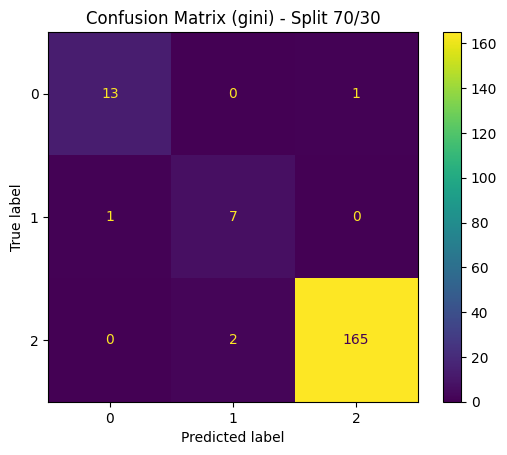

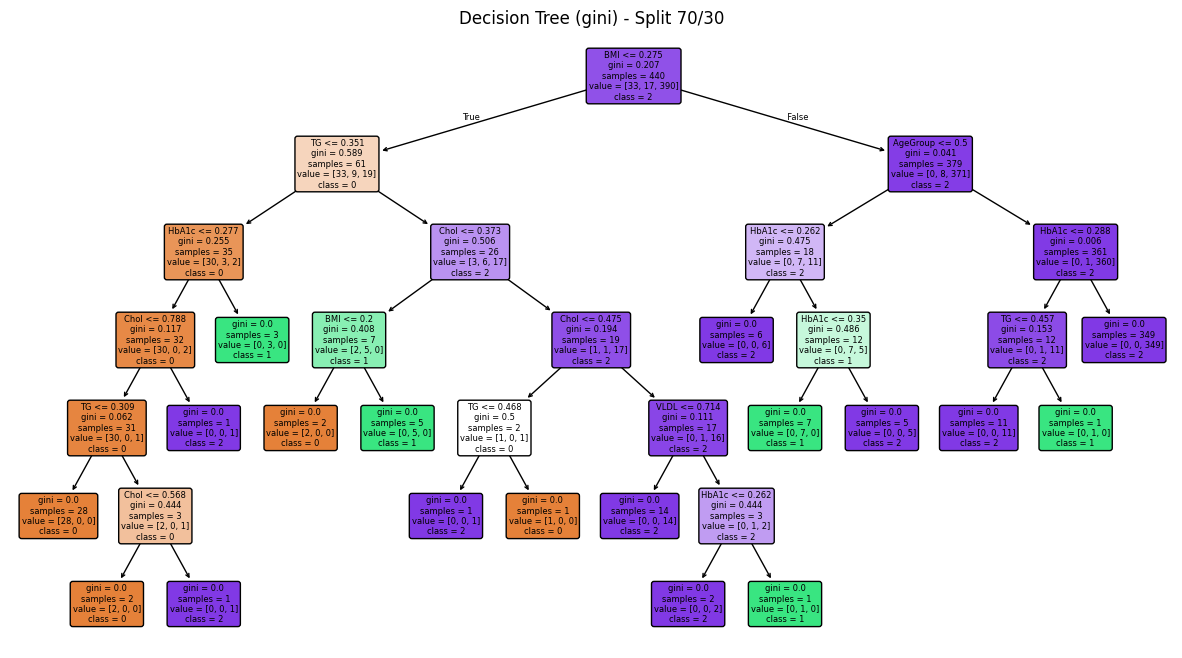


Split 70/30 - Criterion: entropy
Accuracy: 0.9947089947089947
Confusion Matrix:
 [[ 14   0   0]
 [  0   8   0]
 [  1   0 166]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      1.00      1.00         8
           2       1.00      0.99      1.00       167

    accuracy                           0.99       189
   macro avg       0.98      1.00      0.99       189
weighted avg       1.00      0.99      0.99       189



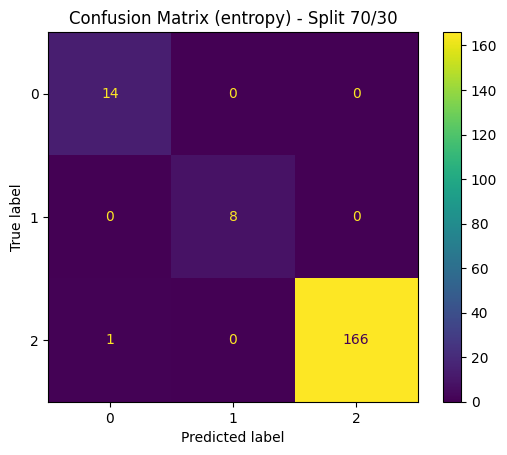

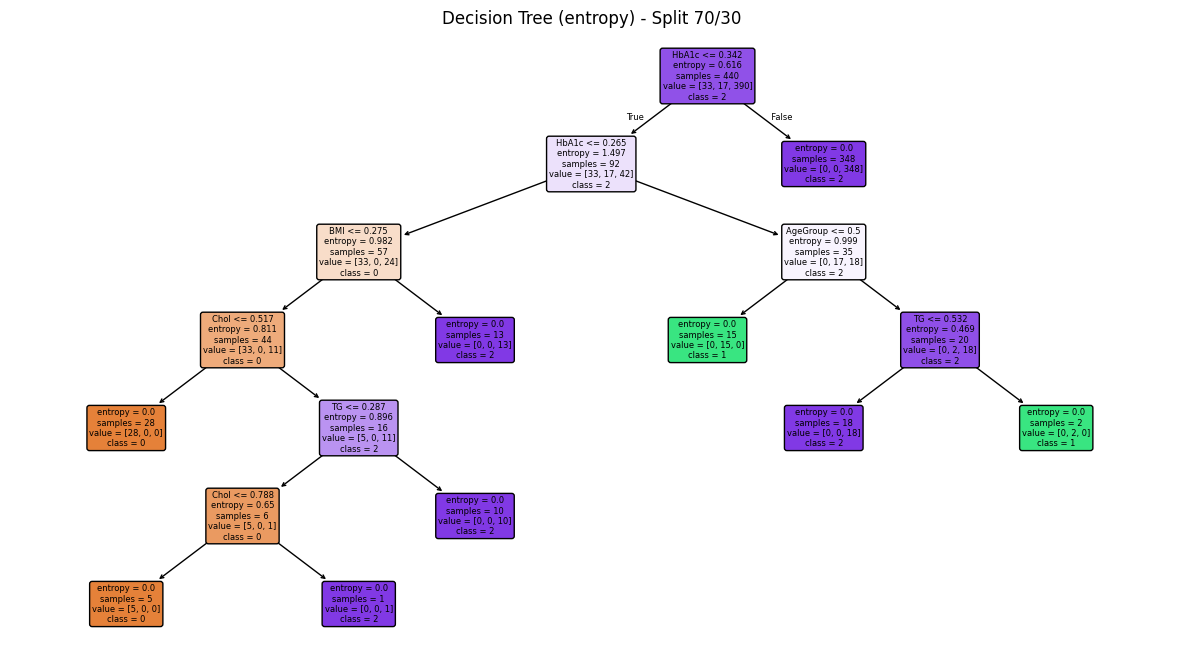


Split 60/40 - Criterion: gini
Accuracy: 0.9801587301587301
Confusion Matrix:
 [[ 17   0   2]
 [  0  10   0]
 [  1   2 220]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.83      1.00      0.91        10
           2       0.99      0.99      0.99       223

    accuracy                           0.98       252
   macro avg       0.92      0.96      0.94       252
weighted avg       0.98      0.98      0.98       252



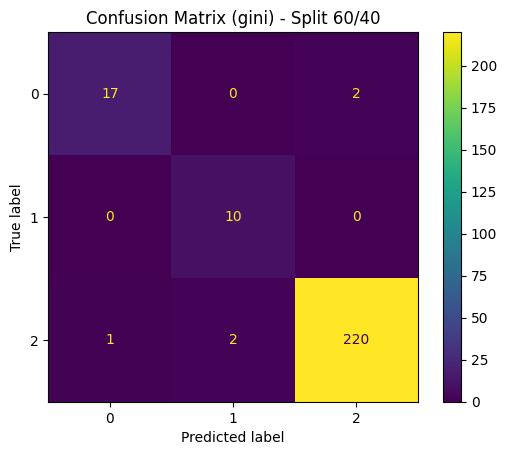

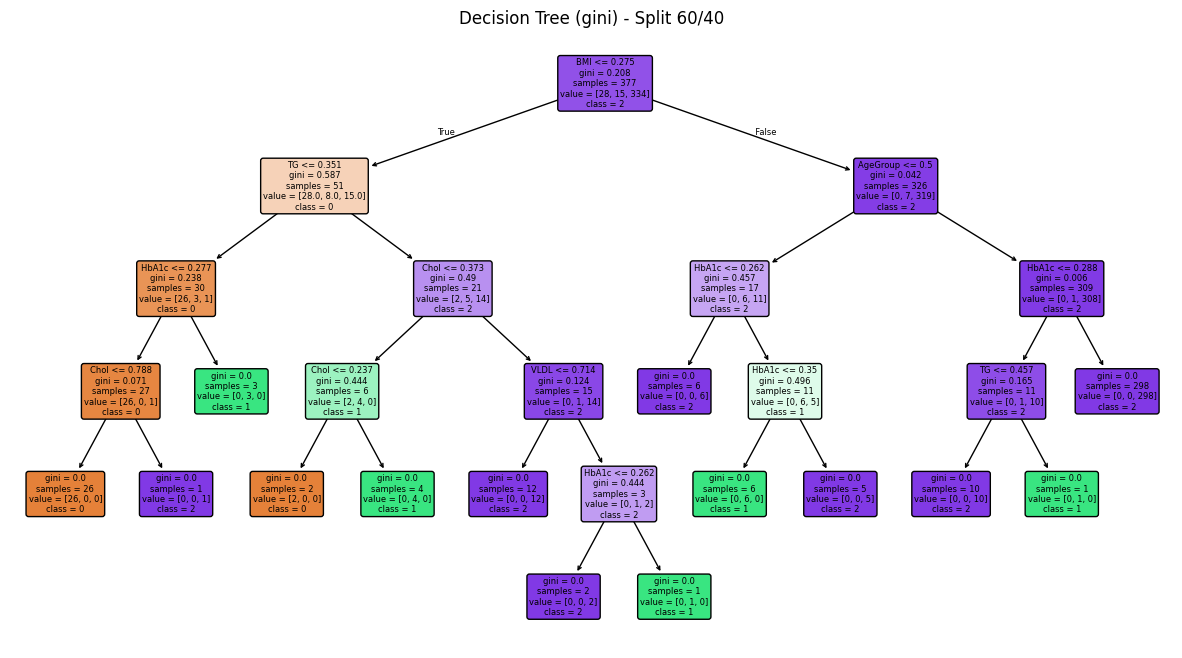


Split 60/40 - Criterion: entropy
Accuracy: 0.9880952380952381
Confusion Matrix:
 [[ 16   0   3]
 [  0  10   0]
 [  0   0 223]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.84      0.91        19
           1       1.00      1.00      1.00        10
           2       0.99      1.00      0.99       223

    accuracy                           0.99       252
   macro avg       1.00      0.95      0.97       252
weighted avg       0.99      0.99      0.99       252



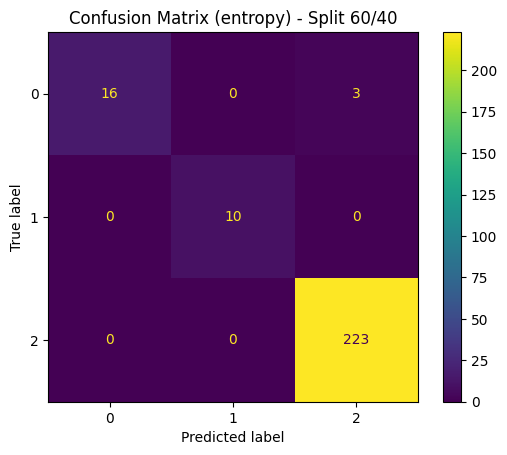

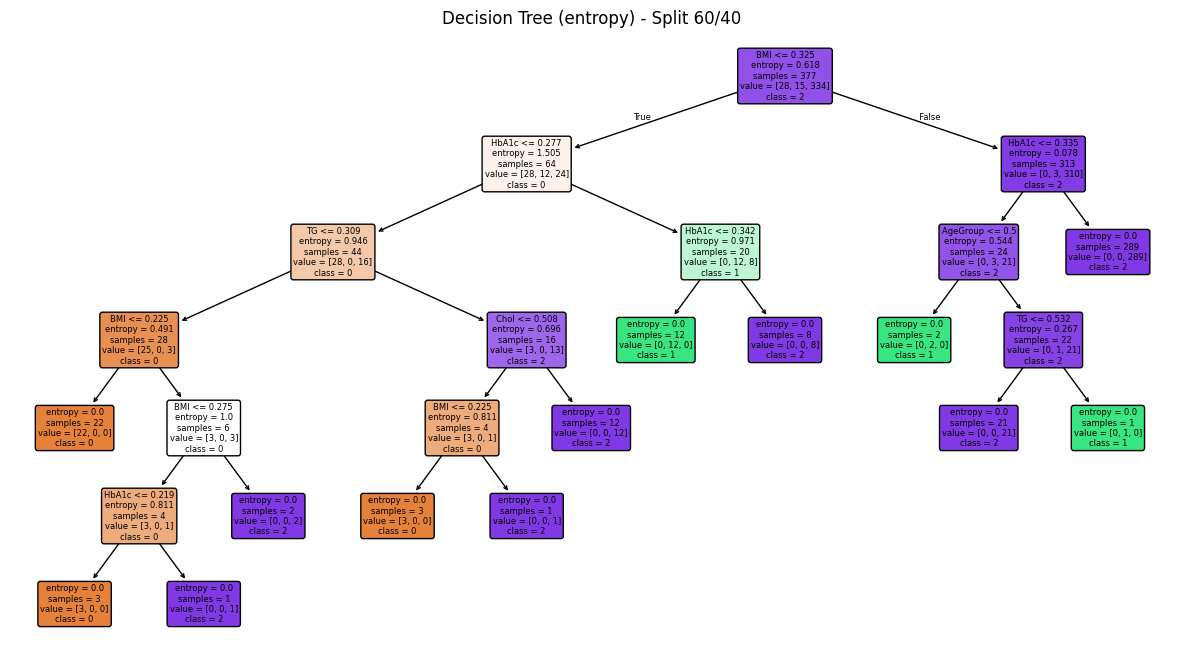


Split 80/19 - Criterion: gini
Accuracy: 0.9841269841269841
Confusion Matrix:
 [[  9   0   0]
 [  0   5   0]
 [  0   2 110]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.71      1.00      0.83         5
           2       1.00      0.98      0.99       112

    accuracy                           0.98       126
   macro avg       0.90      0.99      0.94       126
weighted avg       0.99      0.98      0.99       126



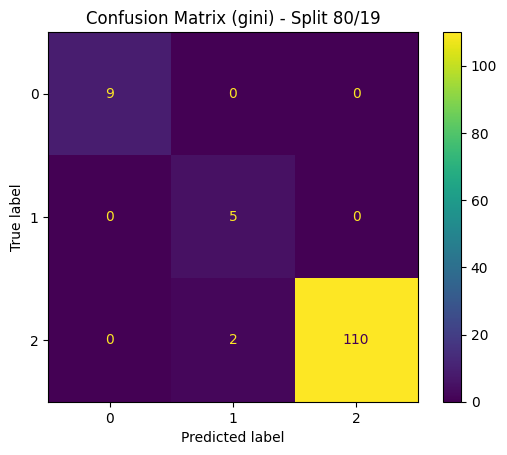

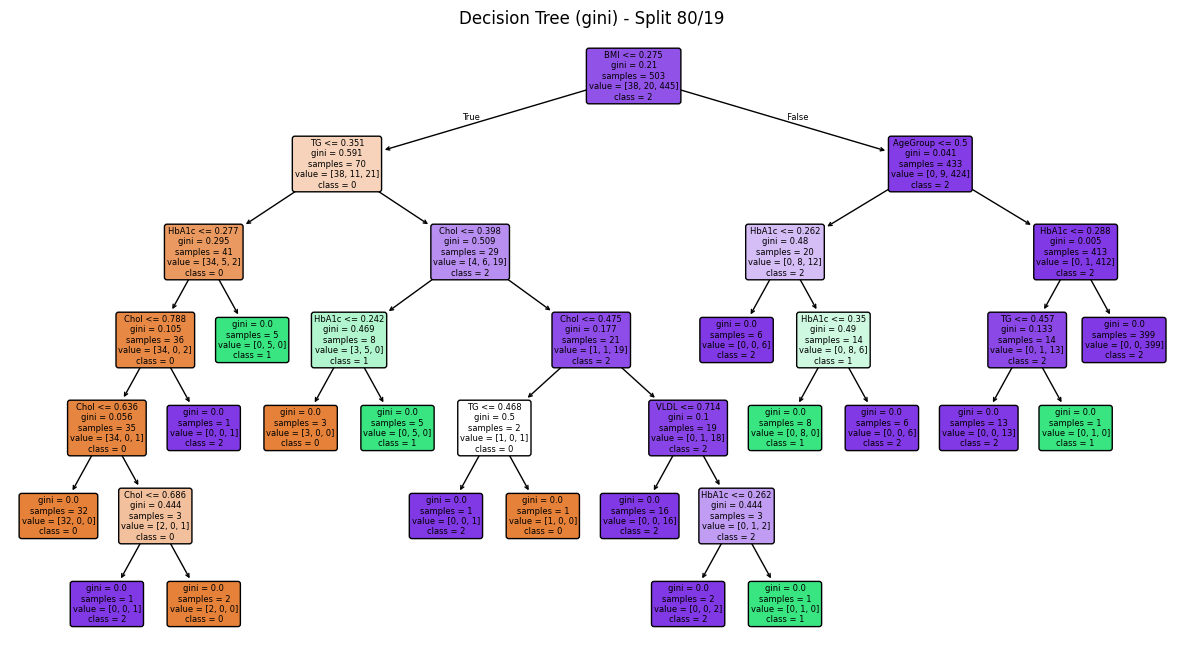


Split 80/19 - Criterion: entropy
Accuracy: 0.9920634920634921
Confusion Matrix:
 [[  9   0   0]
 [  0   5   0]
 [  1   0 111]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      1.00      1.00         5
           2       1.00      0.99      1.00       112

    accuracy                           0.99       126
   macro avg       0.97      1.00      0.98       126
weighted avg       0.99      0.99      0.99       126



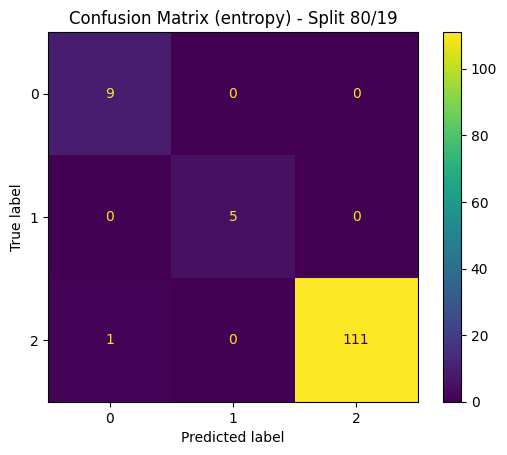

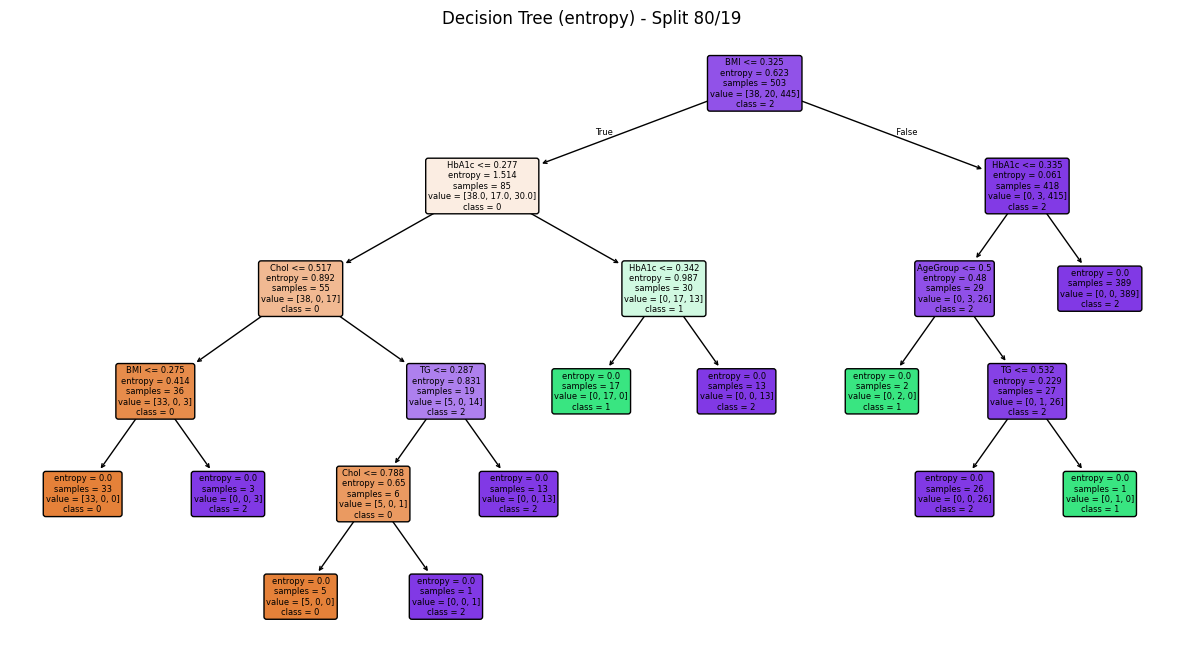


Final Results:
    split criterion  accuracy
0  70/30      gini  0.978836
1  70/30   entropy  0.994709
2  60/40      gini  0.980159
3  60/40   entropy  0.988095
4  80/19      gini  0.984127
5  80/19   entropy  0.992063


In [5]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


url="https://raw.githubusercontent.com/yaraaldos/Diabetes-risk-prediction/refs/heads/main/Dataset/Preprocessed_Dataset.csv"

data = pd.read_csv(url)


target_col = 'CLASS'

X = data.drop(columns=[target_col])
y = data[target_col]

feature_names = X.columns
class_names = y.unique().astype(str)

splits = [0.7, 0.6, 0.8]
criteria = ["gini", "entropy"]
results = []

for s in splits:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=(1 - s), random_state=42, stratify=y
    )

    for c in criteria:
        clf = DecisionTreeClassifier(criterion=c, random_state=42)
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        print(f"\nSplit {int(s*100)}/{int((1-s)*100)} - Criterion: {c}")
        print("Accuracy:", acc)
        print("Confusion Matrix:\n", cm)
        print("Classification Report:\n", classification_report(y_test, y_pred))

        results.append({
            "split": f"{int(s*100)}/{int((1-s)*100)}",
            "criterion": c,
            "accuracy": acc
        })

        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
        disp.plot()
        plt.title(f"Confusion Matrix ({c}) - Split {int(s*100)}/{int((1-s)*100)}")
        plt.show()

        plt.figure(figsize=(15, 8))
        plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True, rounded=True, fontsize=6)
        plt.title(f"Decision Tree ({c}) - Split {int(s*100)}/{int((1-s)*100)}")
        plt.show()

results_df = pd.DataFrame(results)
print("\nFinal Results:\n", results_df)



# **description of the result**



*  After applying Decision Tree classification using the three split sizes (70/30, 60/40, and 80/20) and both attribute selection measures (Gini and Entropy), the overall results were stable and consistently high, with accuracy ranging from 0.97 to 0.99 across all settings. The differences between the splits were very small: in some cases the 60/40 split slightly outperformed 70/30. This fluctuation is normal and reflects small variations in how the data is partitioned.

-------------------------------------------------------------------------------




*   For the size 70% :

Using Gini :
Class 0: There is one misclassification, where one instance was predicted as class 2 instead of class 0.

Class 1: There is one misclassification, where one instance was predicted as class 0 instead of class 1.

Class 2: There is two misclassification, where two instance was predicted as class 1 instead of class 2.



using entropy:

Class 0: All instances were correctly classified with no errors.

Class 1: All instances were also correctly classified with no errors.

Class 2: There is only one misclassification, where one instance of class 2 was predicted as class 0.



-------------------------------------------------------------------------------

*  For the size 60% :



Using Gini :

Class 0: There are two misclassifications, where two instances were predicted as class 2 instead of class 0.

Class 1: All instances were correctly classified with no errors.

Class 2: There are three misclassifications: – one instance predicted as class 0, – and two instances predicted as class 1.


using entropy:Class 0: There are three misclassifications, where three instances were predicted as class 2 instead of class 0.

Class 1: All instances were correctly classified with no errors.

Class 2: All instances were also correctly classified with no errors.


-------------------------------------------------------------------------------

*   For the size 80% :



Using Gini :

Class 0: All instances were correctly classified with no errors.

Class 1: All instances were also correctly classified with no errors.

Class 2: There are two misclassifications, where two instances were predicted as class 1 instead of class 2.


using entropy:


Class 0: All instances were also classified correctly with no errors.

Class 1: All instances were also classified correctly with no errors.

Class 2: There is one misclassification, where one instance of class 2 was predicted as class 0.


--------------------------------------------------------------------------------

*   general note about the matrix :

*   Across all three train-test splits (70/30, 60/40, and 80/19), the entropy-based Decision Tree consistently outperformed the gini model. In each split, the entropy model produced fewer misclassifications and achieved higher overall accuracy.
Therefore, the entropy criterion is considered the best-performing model for this dataset, providing more reliable and stable classification results compared to gini.


*   Across all train–test splits and both criteria (gini and entropy), Class 2 consistently had the highest number of misclassifications. This is mainly because Class 2 is the majority class, meaning it has the largest number of instances, which increases the chance of confusion with neighboring classes. Additionally, its feature values overlap with those of Class 1, making the decision boundaries less distinct. As a result, the model occasionally misclassifies Class 2 instances into other classes.




--------------------------------------------------------------------------------


*  Decision Tree (Gina – Split 70/30)

The Gini tree mainly uses BMI as the first and most important split, which means BMI is the strongest predictor in this setting. After that, the tree uses a few medical features such as HbA1c, TG, and Chol to separate the remaining samples.
Most branches end in Class 2, which matches the fact that Class 2 is the majority in the dataset. The smaller branches separate Class 0 and Class 1 when their values differ clearly.

Decision Tree (Entropy – Split 70/30)
The Entropy tree begins with HbA1c, meaning it is the most informative feature for separating the classes. Then, it mainly uses BMI and AgeGroup to further distinguish the samples.
Just like the Gini tree, most leaves end in Class 2, but the splits in the entropy tree are cleaner and lead to fewer mistakes, which matches its higher accuracy.


--------------------------------------------------------------------------------


*   Decision Tree (gini – Split 60/30)

The Gini tree for the 60/40 split mainly relies on BMI as the first and most important split, which means BMI is the feature that best separates the classes in this partition. After the initial split, the tree uses a few supporting attributes such as TG, HbA1c, and Chol to separate the smaller classes.
Most of the right side of the tree leads to Class 2, which matches the fact that Class 2 is the majority class in the dataset.




Decision Tree (Entropy – Split 60/30)


The entropy tree begins with BMI, but very quickly uses HbA1c as the next main split, confirming again that these two features carry most of the information. The left side separates Class 0 and Class 1 using combinations of TG, BMI, and Chol.
The right side of the tree places most samples into Class 2, and uses HbA1c and AgeGroup to make the splits cleaner



--------------------------------------------------------------------------------


*   Decision Tree (gini – Split 80/19)

The Gini tree for the 80/19 split begins with BMI, which means it is the feature that best separates the classes in this partition.After this main split, the tree uses TG, HbA1c, and Chol on the left side to refine the separation between Class 0 and Class 1 when the samples are smaller.
On the right side of the tree, the model quickly predicts Class 2, and uses AgeGroup and HbA1c to make the split more accurate.





Decision Tree (entropy– Split 80/19)

The entropy tree for the 80/19 split starts with BMI, which means BMI is the most informative feature for separating the classes in this partition. After this main split, the left branch uses Chol, HbA1c, and TG to separate Class 0 and Class 1 when needed.
On the right side of the tree, most samples directly fall into Class 2, and the tree only uses HbA1c, AgeGroup, and TGto refine the remaining cases


--------------------------------------------------------------------------------

*   An important observation in the decision trees is that Class 0 and Class 1 often appear together in the same branch during the early splits. This happens because their feature values are very similar, making them harder to separate at the beginning. In contrast, Class 2 has much clearer patterns, so the tree isolates it first, and only later performs additional splits to distinguish Class 0 from Class 1.”

--------------------------------------------------------------------------------

*   Overall, the consistency across all split sizes and both impurity measures shows that the dataset is highly separable, and the model generalizes well. The stability of the results confirms that the classifier is not overfitting and that the patterns in the data are strong, clear, and easy for the model to learn.

--------------------------------------------------------------------------------



--------------------------------------------------------------------------------

# **Clustering Technique**

In this part of the project, I applied K-Means Clustering to the preprocessed dataset in order to explore hidden patterns and natural groupings among the patients. Unlike classification, which relies on known class labels, clustering is an unsupervised learning technique. This means the algorithm does not use the “CLASS” column and instead groups patients based only on similarities in their medical measurements.

The main goal of this experiment is to understand whether the patients in our dataset naturally form meaningful clusters based on their health indicators (such as BMI, cholesterol levels, triglycerides, HbA1c, etc.). Identifying these clusters can provide additional insights that are not visible through classification alone


After running K-Means using the three values of
k (3, 4, and 5), I calculated the Silhouette Coefficient for each result to evaluate the clustering quality.

The Silhouette Score measures how well each record fits within its assigned cluster compared to other clusters, where higher scores indicate better-defined and more separated clusters.


The results show that k = 3 achieved the highest Silhouette Score among the tested values, while k = 4 and k = 5 produced lower scores. This means that the clustering structure with three clusters provides the clearest separation and the most meaningful grouping for this dataset.
Therefore, based on the Silhouette analysis, k = 3 is the most appropriate number of clusters.

In [ ]:
df_cluster = data.copy()

# Remove the target column
features = df_cluster.drop('CLASS', axis=1)


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


df_scaled = pd.DataFrame(scaled_features, columns=features.columns)

print("\nScaled Data (first 5 rows):")
print(df_scaled.head())



Scaled Data (first 5 rows):
      HbA1c      Chol        TG      VLDL       BMI  AgeGroup
0 -1.773485 -1.702821 -1.130824 -1.316184 -1.916821 -2.221252
1 -1.773485 -1.069745 -0.831334 -0.872875 -1.256753 -2.221252
2 -1.773485 -1.702821 -1.330483 -1.316184 -1.256753 -2.221252
3 -1.339270 -0.527108 -0.432014 -0.429566 -1.476776 -2.221252
4 -1.773485 -0.707987 -0.631674 -0.651220 -1.256753 -2.221252


Before applying K-Means, I prepared the dataset by selecting only the attributes that are suitable for clustering. Since K-Means can only work with numeric values. I also removed the target column CLASS.

After selecting the features, I applied StandardScaler to standardize all the medical attributes.

Standardization is important because the medical features in the dataset use different measurement units, and K-Means depends on distance calculations. (Scaling ensures that all features contribute equally to the clustering and prevents attributes with large numeric ranges from dominating the results).


**Elbow method to suggest three K values:**

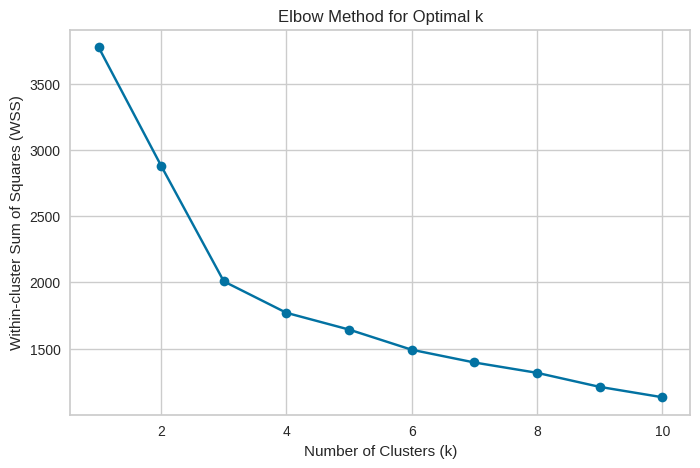

In [ ]:
from matplotlib.lines import lineStyles
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#k-means clustering for different values of k
wss_values = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wss_values.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 5))
plt.plot(k_values, wss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


After scaling the dataset, I applied the Elbow Method to explore different values of K for K-means clustering.

 From the elbow graph, the curve decreases sharply before slowing down around K = 3, K = 4, and K = 5. These three values appear near the “bend” of the curve, which means they are the most reasonable candidates for K. Based on this observation, I selected K = 3, K = 4, and K = 5 for further evaluation.


**K-Means for k = 3, 4, 5:**

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

np.random.seed(42)

#K-Means with k = 3
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_result_3 = kmeans_3.fit(df_scaled)

print("Cluster Centers (k = 3):")
print(kmeans_result_3.cluster_centers_)

print("\nCluster Labels (k = 3):")
print(kmeans_result_3.labels_)


Cluster Centers (k = 3):
[[ 0.36961662  0.56947035  0.95936493  0.95257794  0.44821149  0.43735297]
 [ 0.17848389 -0.34422594 -0.55459024 -0.53478145  0.19149781  0.43328857]
 [-1.26934443 -0.09213748 -0.23140373 -0.27757405 -1.46420284 -2.17036767]]

Cluster Labels (k = 3):
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 0 2 2 1
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 0 0 1 0 1 1 0 1
 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

np.random.seed(42)

#K-Means with k = 4
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_result_4 = kmeans_4.fit(df_scaled)

print("Cluster Centers (k = 4):")
print(kmeans_result_4.cluster_centers_)

print("\nCluster Labels (k = 4):")
print(kmeans_result_4.labels_)


Cluster Centers (k = 4):
[[-1.26934443 -0.09213748 -0.23140373 -0.27757405 -1.46420284 -2.17036767]
 [ 0.43390625  0.31297395 -0.14583524 -0.23845027 -0.08088311  0.42645026]
 [ 0.35451835  0.46142952  1.13177686  1.232843    0.59491918  0.43328857]
 [-0.1444088  -0.94787636 -0.86319449 -0.79427381  0.55278559  0.45019647]]

Cluster Labels (k = 4):
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 2 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 3 2 2 3 2 3 3 2 1
 1 1 1 1 1 1 1 1 1 2 3 2 1 1 3 1 1 3 1 2 1 3 2 1 1 3 3 1 3 3 2 3 2 3 3 3 3
 3 1 1 1 3 1 1 1 1 3 3 2 3 3 3 3 1 2 1 1 1 1 3 2 3 3 3 2 3 2 3 3 2 1 3 1 1
 3 3 3 3 3 3 3 1 1 1 1 3 1 1 3 1 1 3 3 1 1 3 1 2 1 1 3 1 2 3 1 1 1 1 2 3 1
 2 3 1 1 1 1 1 3 1 3 1 1 2 2 3 3 3 3 1 2 1 2 3 1 1 1 3 3 2 1 1 3 1 3 3 1 1
 1 1 2 2 1 2 2 1 1 2 1 2 1 1 1 1 1 2 1 3 2 2 3 2 2 2 3 3 1 2 1 1 1 2 1 2 1
 1 1 1 1 1 2 3 3 3 3 2 1 2 1 3 2 3 3 2 1 2 2 1 1 

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

np.random.seed(42)

#K-Means with k = 5
kmeans_5 = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_result_5 = kmeans_5.fit(df_scaled)

print("Cluster Centers (k = 5):")
print(kmeans_result_5.cluster_centers_)

print("\nCluster Labels (k = 5):")
print(kmeans_result_5.labels_)


Cluster Centers (k = 5):
[[-0.30000856  0.40079051 -0.08289164 -0.15406294  0.26177668  0.45019647]
 [-1.26934443 -0.09213748 -0.23140373 -0.27757405 -1.46420284 -2.17036767]
 [ 1.30114843 -0.09731336 -0.2882226   0.06051442  0.04172421  0.40117906]
 [ 0.43497629  0.62393958  1.45980355  1.29421016  0.4334215   0.42811838]
 [-0.06901393 -1.07824802 -0.90812611 -0.91265883  0.43089646  0.45019647]]

Cluster Labels (k = 5):
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 3 1 0 1 1 2
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 3 3 0 3 0 0 3 2
 0 2 2 0 0 2 0 0 0 3 4 3 0 0 4 0 0 4 0 0 0 4 0 2 0 4 4 0 4 4 0 4 0 4 4 4 4
 4 0 0 2 4 0 0 0 0 4 4 0 4 4 4 4 0 0 0 0 0 2 0 3 4 4 0 3 4 3 4 4 3 0 4 2 0
 4 4 4 4 4 4 4 0 0 0 0 4 0 0 4 0 0 4 4 0 0 4 2 3 3 2 0 3 3 0 2 0 2 0 0 4 2
 0 0 0 0 0 0 0 4 0 0 0 0 3 3 4 0 4 0 4 3 4 3 0 0 2 2 4 4 3 0 0 4 2 0 4 2 0
 0 0 0 0 2 3 3 0 0 3 0 3 0 0 0 0 0 3 0 4 3 3 4 3 

I applied K-Means three times using k = 3, k = 4, and k = 5.
Each run produced its own set of cluster centers and labels, showing how the patients were grouped at each value of k.

Overall, running K-Means with three different values of k helps us compare how the number of clusters influences the structure of the data. These results will be evaluated in the next step using the Silhouette Coefficient to identify which value of k provides the best and most meaningful clustering.

In [ ]:
from sklearn.metrics import silhouette_score

# Compute average silhouette score for k = 3
silhouette_avg_3 = silhouette_score(df_scaled, kmeans_result_3.labels_)
print("Average Silhouette Score for k = 3:", silhouette_avg_3)

# Compute average silhouette score for k = 4
silhouette_avg_4 = silhouette_score(df_scaled, kmeans_result_4.labels_)
print("Average Silhouette Score for k = 4:", silhouette_avg_4)

# Compute average silhouette score for k = 5
silhouette_avg_5 = silhouette_score(df_scaled, kmeans_result_5.labels_)
print("Average Silhouette Score for k = 5:", silhouette_avg_5)

Average Silhouette Score for k = 3: 0.2905174344402208
Average Silhouette Score for k = 4: 0.23643877686528392
Average Silhouette Score for k = 5: 0.23566515074242902


**Plot Silhouette scores for k = 3, 4, 5**

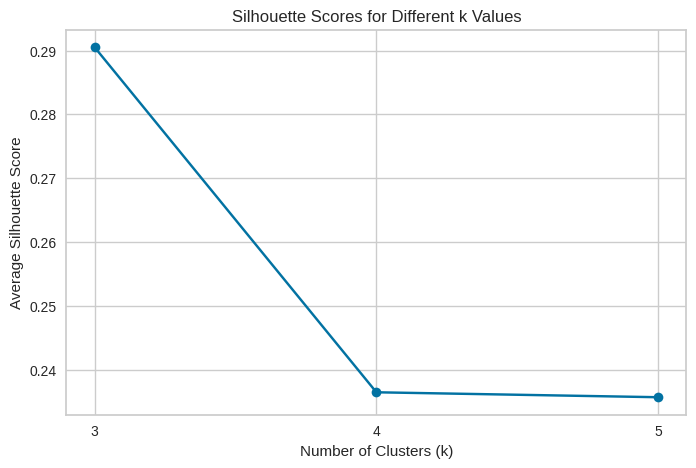

In [ ]:
import matplotlib.pyplot as plt

k_values = [3, 4, 5]
silhouette_scores = [silhouette_avg_3, silhouette_avg_4, silhouette_avg_5]

plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k Values')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()


**SilhouetteVisualizer:**

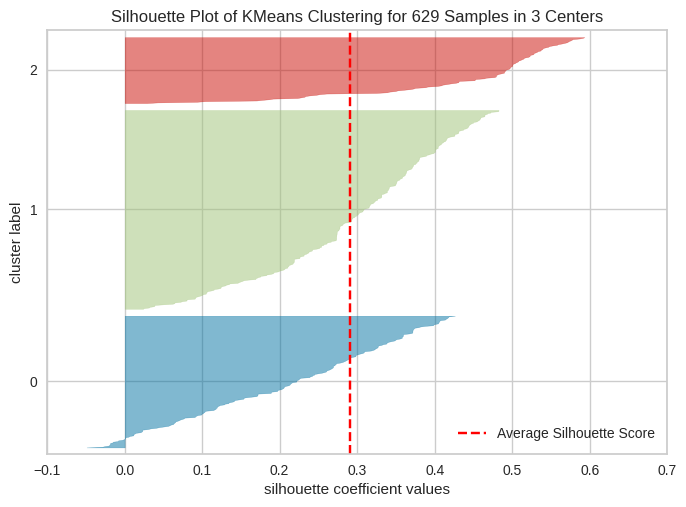

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 629 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

# KMeans with the chosen number of clusters (k = 3)
kmeans_final = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(kmeans_final, colors='yellowbrick')

visualizer.fit(df_scaled)
visualizer.show()


This Silhouette Plot shows how well the data fits into the 3 clusters. Each colored shape represents one cluster, and the red dashed line marks the average silhouette score. Higher values indicate better-defined clusters.

**Scatter Plot:**

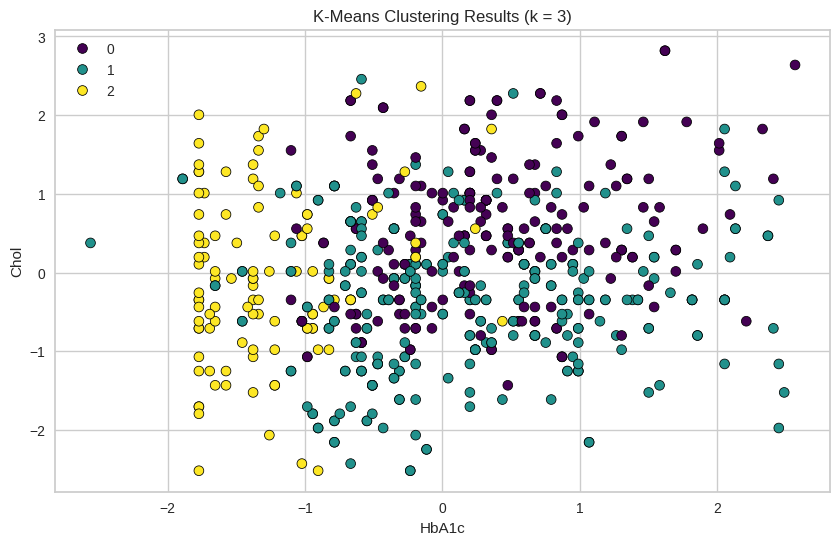

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Run K-Means with k = 3
kmeans_final = KMeans(n_clusters=3, random_state=42)
df_scaled['Cluster'] = kmeans_final.fit_predict(df_scaled)

#2 medical features
feature_x = df_scaled.columns[0]
feature_y = df_scaled.columns[1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=feature_x, y=feature_y, hue="Cluster", data=df_scaled, palette='viridis', edgecolor='black')
plt.title('K-Means Clustering Results (k = 3)')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend()
plt.show()


This scatter plot shows the K-Means clustering results for k = 3. Each color represents one of the three clusters. The plot uses two medical features (HbA1c and Chol) just to help visualize the separation. The points are spread out, but we can still see that the algorithm grouped patients with similar values into the same color. This confirms that the clustering method was able to form three meaningful groups in the dataset.

# **[6] Evluation and Comparison**

--------------------------------------------------------------------------------


Split 70/30 - Criterion: gini
Accuracy: 0.9788359788359788
Confusion Matrix:
 [[ 13   0   1]
 [  1   7   0]
 [  0   2 165]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.78      0.88      0.82         8
           2       0.99      0.99      0.99       167

    accuracy                           0.98       189
   macro avg       0.90      0.93      0.91       189
weighted avg       0.98      0.98      0.98       189



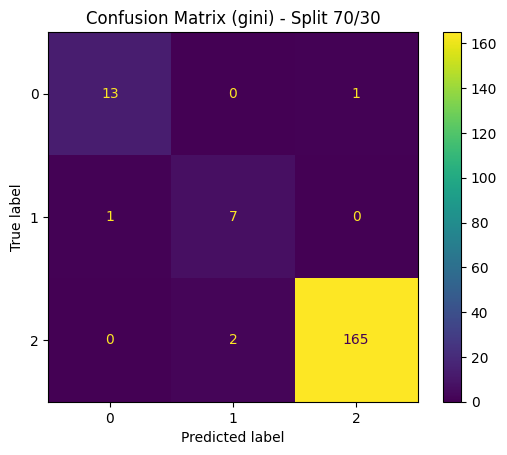

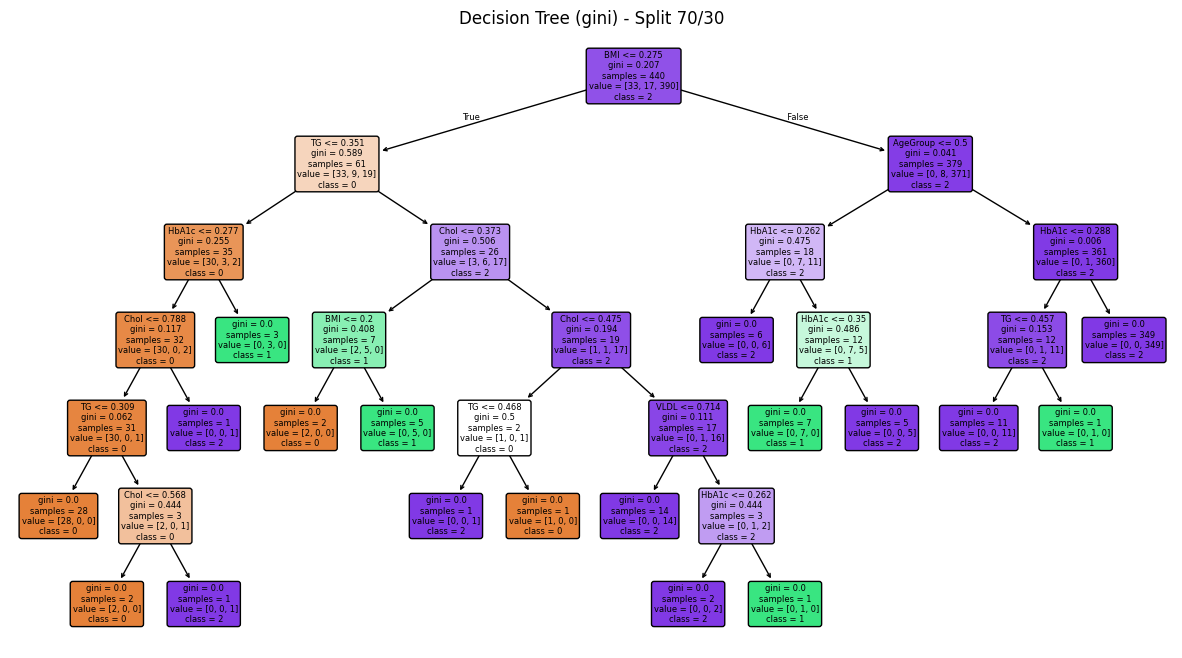


Split 70/30 - Criterion: entropy
Accuracy: 0.9947089947089947
Confusion Matrix:
 [[ 14   0   0]
 [  0   8   0]
 [  1   0 166]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      1.00      1.00         8
           2       1.00      0.99      1.00       167

    accuracy                           0.99       189
   macro avg       0.98      1.00      0.99       189
weighted avg       1.00      0.99      0.99       189



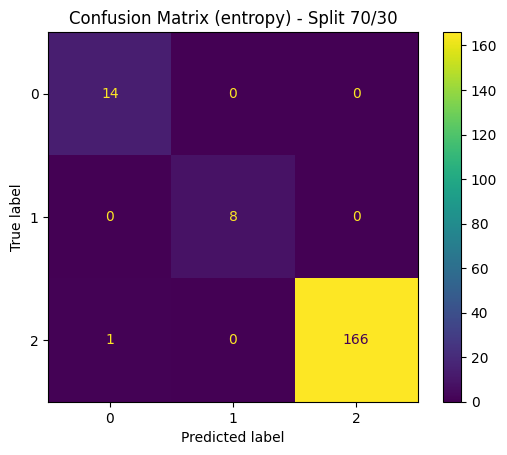

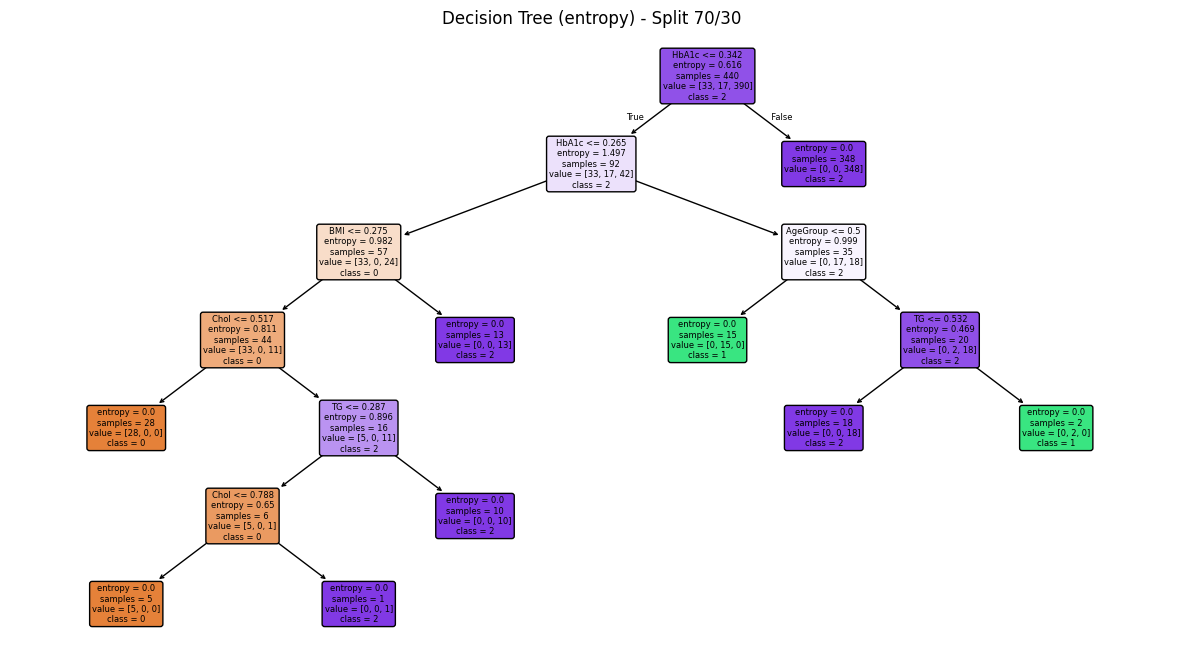


Split 60/40 - Criterion: gini
Accuracy: 0.9801587301587301
Confusion Matrix:
 [[ 17   0   2]
 [  0  10   0]
 [  1   2 220]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.83      1.00      0.91        10
           2       0.99      0.99      0.99       223

    accuracy                           0.98       252
   macro avg       0.92      0.96      0.94       252
weighted avg       0.98      0.98      0.98       252



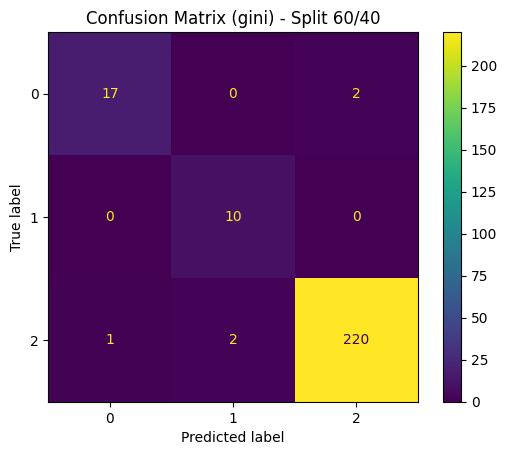

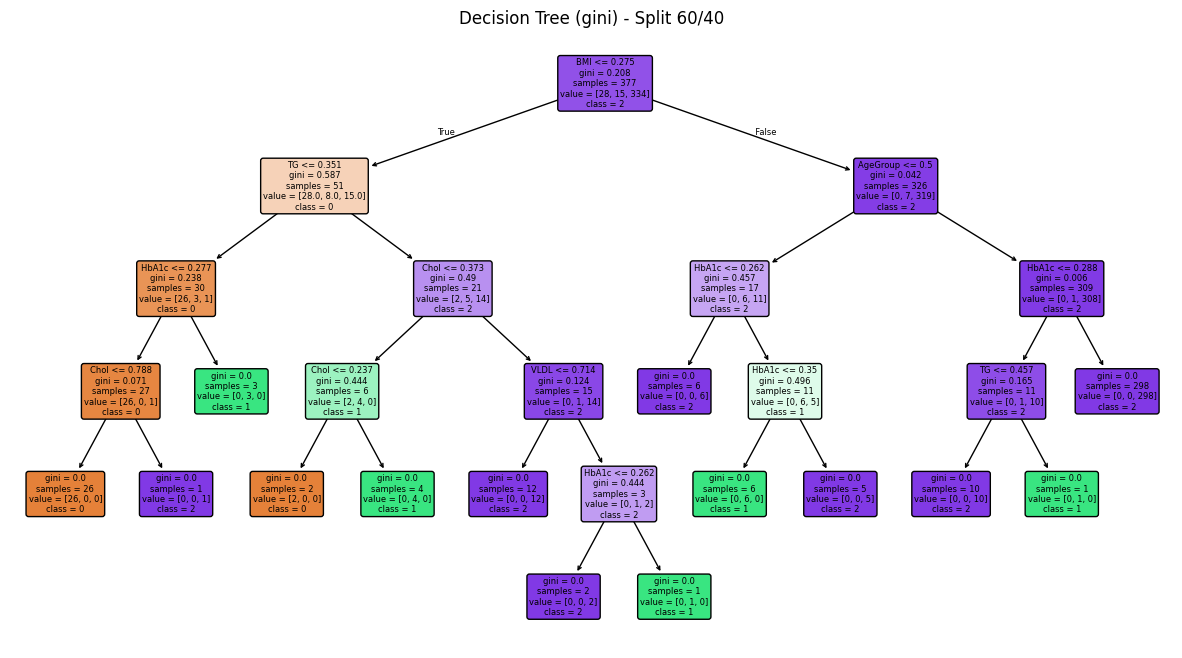


Split 60/40 - Criterion: entropy
Accuracy: 0.9880952380952381
Confusion Matrix:
 [[ 16   0   3]
 [  0  10   0]
 [  0   0 223]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.84      0.91        19
           1       1.00      1.00      1.00        10
           2       0.99      1.00      0.99       223

    accuracy                           0.99       252
   macro avg       1.00      0.95      0.97       252
weighted avg       0.99      0.99      0.99       252



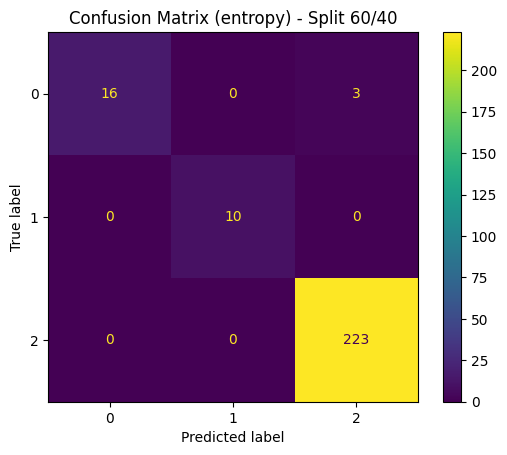

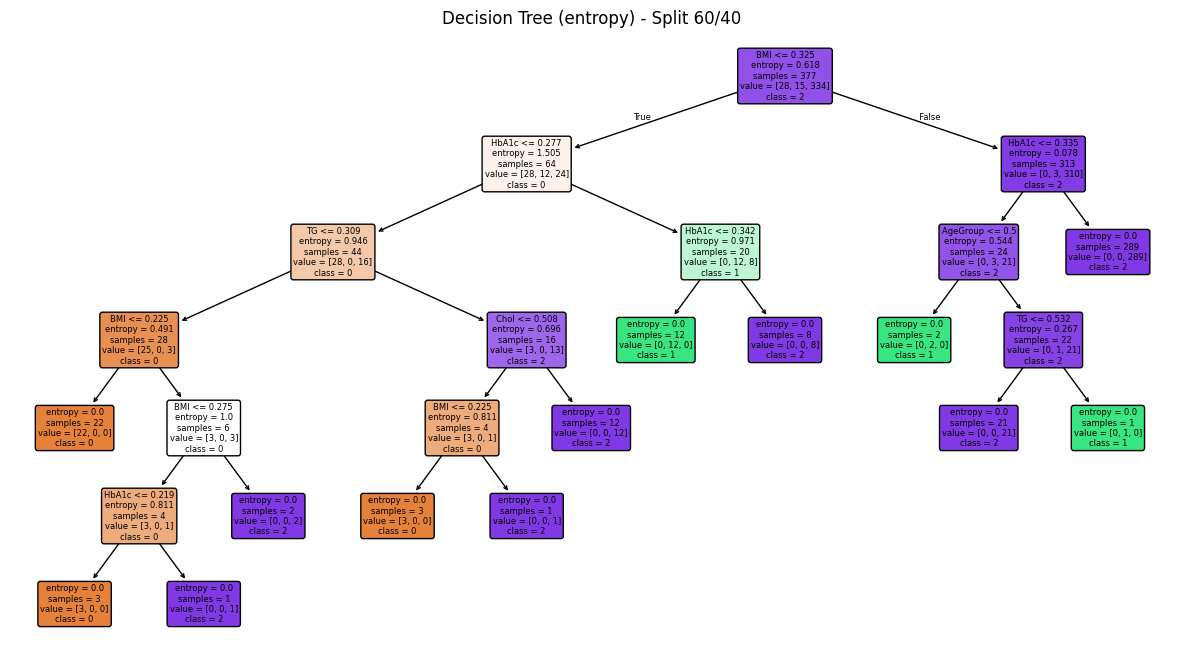


Split 80/19 - Criterion: gini
Accuracy: 0.9841269841269841
Confusion Matrix:
 [[  9   0   0]
 [  0   5   0]
 [  0   2 110]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.71      1.00      0.83         5
           2       1.00      0.98      0.99       112

    accuracy                           0.98       126
   macro avg       0.90      0.99      0.94       126
weighted avg       0.99      0.98      0.99       126



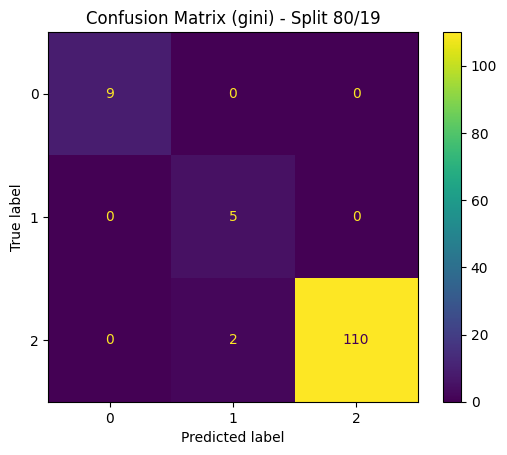

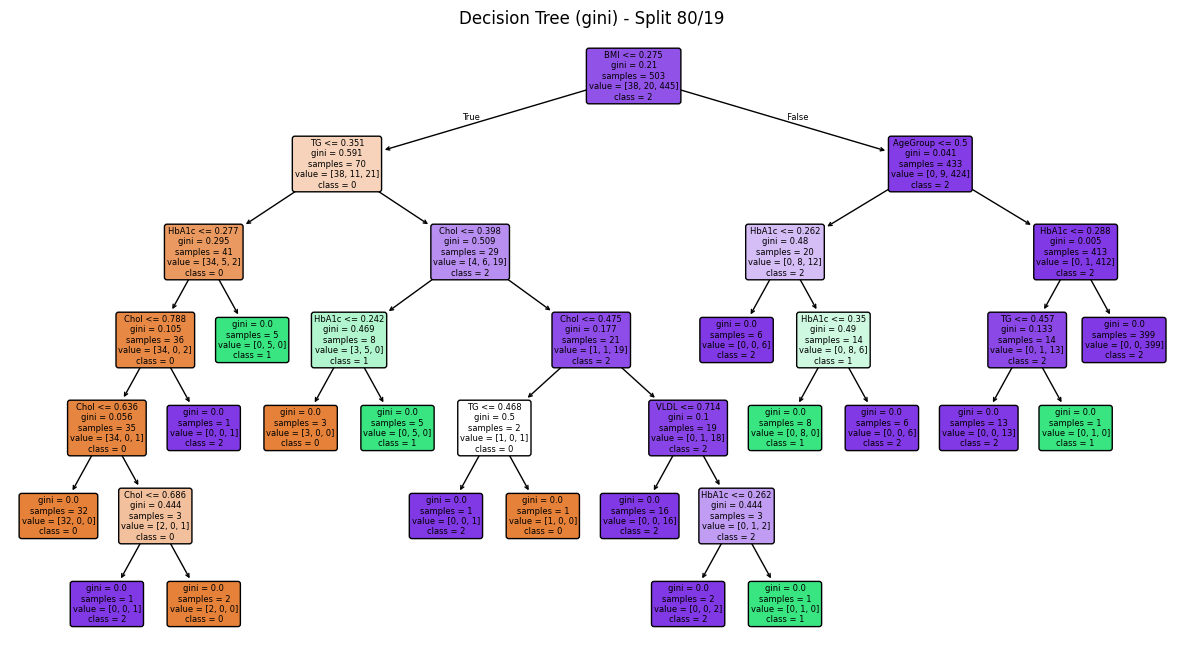


Split 80/19 - Criterion: entropy
Accuracy: 0.9920634920634921
Confusion Matrix:
 [[  9   0   0]
 [  0   5   0]
 [  1   0 111]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      1.00      1.00         5
           2       1.00      0.99      1.00       112

    accuracy                           0.99       126
   macro avg       0.97      1.00      0.98       126
weighted avg       0.99      0.99      0.99       126



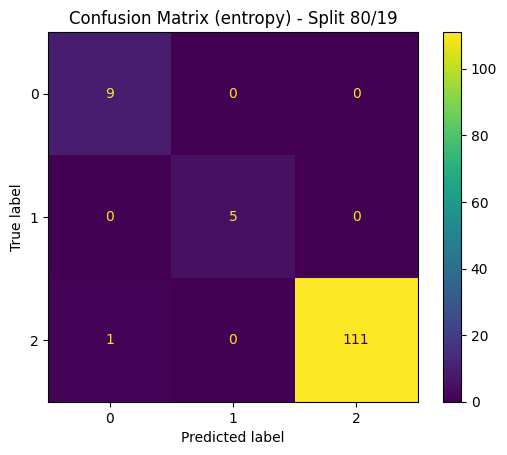

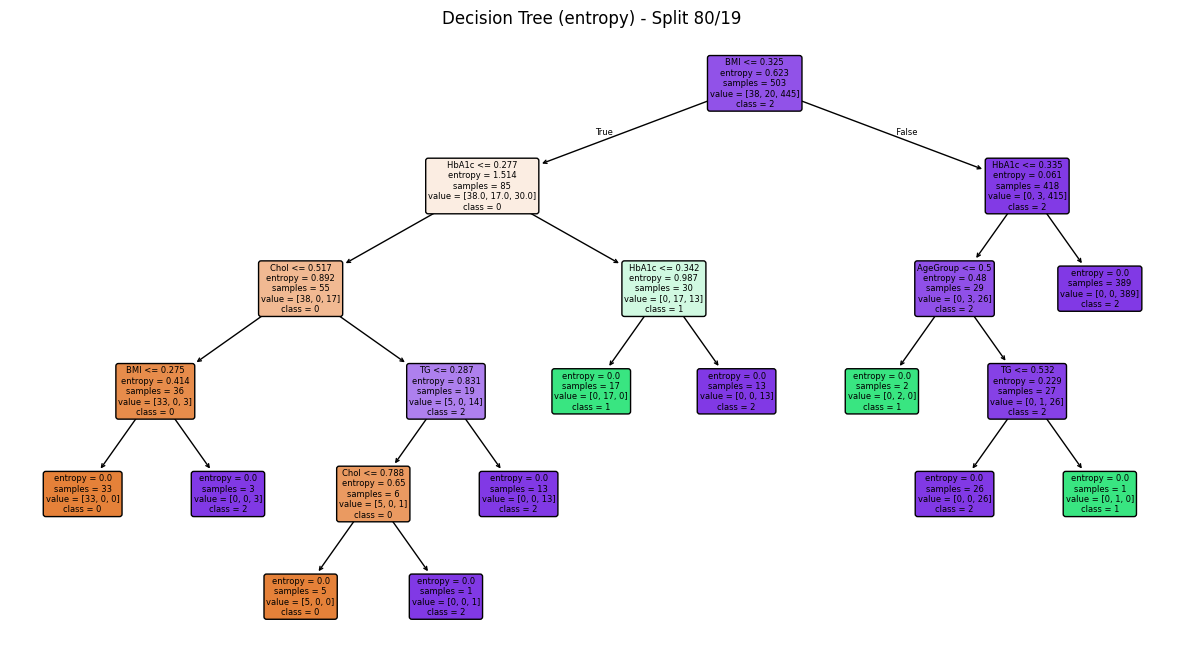


Final Results:
    split criterion  accuracy
0  70/30      gini  0.978836
1  70/30   entropy  0.994709
2  60/40      gini  0.980159
3  60/40   entropy  0.988095
4  80/19      gini  0.984127
5  80/19   entropy  0.992063

Accuracy table:
 split         60/40     70/30     80/19
criterion                              
entropy    0.988095  0.994709  0.992063
gini       0.980159  0.978836  0.984127


In [10]:



target_col = "CLASS"

# Features and target
X = data.drop(columns=[target_col])
y = data[target_col]

feature_names = X.columns
class_names = y.unique().astype(str)

# splits  used: 70/30, 60/40, 80/20
splits = [0.7, 0.6, 0.8]              # training ratios
criteria = ["gini", "entropy"]        # Gini & Entropy
results = []                          # to store accuracies for the final table

for s in splits:
    # ---------------------------------------
    # Data splitting
    # ---------------------------------------
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=(1 - s),
        random_state=42,
        stratify=y
    )

    for c in criteria:
        # ---------------------------------------
        # Classification: train the decision tree
        # ---------------------------------------
        clf = DecisionTreeClassifier(criterion=c, random_state=42)
        clf.fit(X_train, y_train)

        # Predictions
        y_pred = clf.predict(X_test)

        # =======================================
        # >>> Evaluation <<<
        # =======================================
        acc = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        print(f"\nSplit {int(s*100)}/{int((1-s)*100)} - Criterion: {c}")
        print("Accuracy:", acc)
        print("Confusion Matrix:\n", cm)
        print("Classification Report:\n", classification_report(y_test, y_pred))

        # Save accuracy for the final table
        results.append({
            "split": f"{int(s*100)}/{int((1-s)*100)}",
            "criterion": c,
            "accuracy": acc
        })

        # ---- Plot 1: Confusion Matrix ----
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
        disp.plot()
        plt.title(f"Confusion Matrix ({c}) - Split {int(s*100)}/{int((1-s)*100)}")
        plt.show()

        # ---- Plot 2: Decision Tree (main output) ----
        plt.figure(figsize=(15, 8))
        plot_tree(
            clf,
            feature_names=feature_names,
            class_names=class_names,
            filled=True,
            rounded=True,
            fontsize=6
        )
        plt.title(f"Decision Tree ({c}) - Split {int(s*100)}/{int((1-s)*100)}")
        plt.show()

# ---------------------------------------
# Final Accuracy Table
# ---------------------------------------
results_df = pd.DataFrame(results)
print("\nFinal Results:\n", results_df)

# pivot  put it in a  table
accuracy_table = results_df.pivot(index="criterion", columns="split", values="accuracy")
print("\nAccuracy table:\n", accuracy_table)


### **Evaluation of the 70/30 Split**
> The 70/30 split provided the most informative comparison between the two impurity measures. In this partition, both models—Gini and Entropy—achieved high accuracy, but the Entropy-based decision tree clearly outperformed the Gini model. The Gini classifier recorded an accuracy of 0.9788, with misclassifications distributed across all three classes. Specifically, Class 0 had one instance predicted as Class 2, Class 1 had one instance predicted as Class 0, and Class 2 experienced two misclassifications into Class 1. These scattered errors indicate that the Gini model produced slightly less precise decision boundaries for this dataset.

In contrast, the Entropy model performed almost flawlessly, achieving 0.9947, the highest accuracy across all experiments. The confusion matrix showed only one misclassification, where a single Class 2 sample was predicted as Class 0. The much cleaner diagonal pattern indicates a more refined separation of the classes. Because of this, Entropy is considered the best-performing criterion for the 70/30 split, as it provides a more informative split strategy that captures subtle distinctions between the classes. This performance suggests that with a sufficiently large training set, the dataset becomes highly separable when using an information-theoretic impurity measure.



---



### **Evaluation of the 60/40 Split**
Under the 60/40 split, both models again achieved high accuracy, though slightly lower than the 70/30 split due to the reduced training size. The Gini model reached an accuracy of 0.9802. Its confusion matrix showed noticeable misclassification patterns: Class 0 had two samples incorrectly predicted as Class 2; Class 2 had three misclassified cases—one predicted as Class 0 and two predicted as Class 1. These errors emphasize that when the training portion is smaller, Gini becomes more sensitive to class overlap, especially between Class 2 and the other two classes.

Meanwhile, the Entropy model demonstrated greater stability by achieving 0.9881, outperforming Gini once again. Even though its errors were slightly higher than in the 70/30 split, the structure of the confusion matrix shows that Entropy maintained consistent decision boundaries. Most misclassifications occurred in Class 0, with three samples predicted as Class 2, while Class 1 and Class 2 were predicted perfectly. This behavior reflects the fact that Entropy captures more nuanced information in the presence of reduced training size, preserving accuracy even with a larger test portion. As a result, Entropy remains the dominant impurity measure for this split.



---



### **Evaluation of the 80/20 Split (80/19 Actual)**
Although this split appears as 80/19 due to stratified sampling, it still provides meaningful insights. With a large training set, both models performed exceptionally well. The Gini model achieved 0.9841, showing near-perfect classification except for two instances of Class 2 incorrectly predicted as Class 1. This reflects Gini’s strength when the training portion is large—misclassifications become limited and decision boundaries become more confident.

The Entropy model again delivered superior performance, reaching 0.9921. Its confusion matrix showed just a single error where one Class 2 sample was predicted as Class 0. Importantly, both Class 0 and Class 1 were classified with 100% accuracy. This clean result confirms that Entropy benefits significantly from having more training examples, producing highly refined splits driven by information gain. Therefore, in the 80/20 configuration, Entropy continues to be the most reliable and accurate classification strategy.




---

### **Overall Comparison Across All Splits**
Across all three splits, the Entropy-based decision tree consistently outperformed the Gini model in every evaluation metric. For each partitioning (60/40, 70/30, and 80/20), Entropy achieved higher accuracy and produced fewer misclassifications. This consistency indicates that Entropy forms more informative and cleaner decision boundaries, making it particularly effective for datasets where class overlap exists. Gini remained close in performance, but small classification errors—especially in Classes 0 and 2—caused slight drops in accuracy. The stability of Entropy across different training sizes suggests that it generalizes better and adapts more effectively to complex class distributions.




---
### **Best Model, Best Split, and Why**
Based on all evaluations, the best-performing model overall is the Decision Tree using Entropy. It achieved the highest accuracy in every split and consistently produced the cleanest confusion matrices. The best split size is 70/30, where Entropy reached 0.9947, the highest accuracy across all results. This split provided the best balance between training size (enough samples to learn strong patterns) and testing size (enough samples to evaluate performance accurately).

# **Why Entropy is better:**




*   It measures information gain, making it more sensitive to class distribution.



*   It reduces impurity more effectively than Gini in this dataset.



*   It produces more precise splits when classes overlap.



## **Why the accuracy is high overall:**

* The dataset is highly separable.




* Medical indicators (BMI, HbA1c, TG, etc.) carry strong predictive signals.

* Decision trees are well-suited for tabular clinical data.


*   Most classes, especially Class 2, have distinct patterns that are easy for the model to learn.




# **[7] Findings and Discussion**

--------------------------------------------------------------------------------

# **[8] Refrences**